<a href="https://colab.research.google.com/github/Garlid/Unsupervised-Machine-Learning/blob/main/Learner_Notebook_PCA_and_tSNE_Project_FullCode_version_(1)_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA and t-SNE Project: Auto MPG**

# **Marks: 30**

Welcome to the project on PCA and t-SNE. In this project, we will be using the **auto-mpg dataset**.


-----------------------------
## **Context**
-----------------------------

The shifting market conditions, globalization, cost pressure, and volatility are leading to a change in the automobile market landscape. The emergence of data, in conjunction with machine learning in automobile companies, has paved a way that is helping bring operational and business transformations.

The automobile market is vast and diverse, with numerous vehicle categories being manufactured and sold with varying configurations of attributes such as displacement, horsepower, and acceleration. We aim to find combinations of these features that can clearly distinguish certain groups of automobiles from others through this analysis, as this will inform other downstream processes for any organization aiming to sell each group of vehicles to a slightly different target audience.

You are a Data Scientist at SecondLife which is a leading used car dealership with numerous outlets across the US. Recently, they have started shifting their focus to vintage cars and have been diligently collecting data about all the vintage cars they have sold over the years. The Director of Operations at SecondLife wants to leverage the data to extract insights about the cars and find different groups of vintage cars to target the audience more efficiently.

-----------------------------
## **Objective**
-----------------------------
The objective of this problem is to **explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

-----------------------------
## **Dataset**
-----------------------------
There are 8 variables in the data:

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

## **Importing the necessary libraries and overview of the dataset**

In [ ]:
import pandas as pd

import numpy as np

#Importing matplotlib for plots
import matplotlib.pyplot as plt

#Importing Seaborn to spruce up visualizations
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

#Importing PCA and t-SNE from SciKitLearn, as sklearn is a machine learning libary
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

### **Loading the data**

In [ ]:
#First, we will mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Creating dataframe from csv
df = pd.read_csv('/content/drive/MyDrive/Data Science/Elective Project/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


### **Data Overview**

- Observations
- Sanity checks




In [ ]:
#Let's first look at the data to see what kinds of data types we are dealing with
#as well as to see if there are any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**Observations:**
* There are 398 rows in our dataset
* We have integers, floating numbers, and objects as our datatypes.3 variables are floating numbers, 3 are integers, and 2 are objects. In other words, all but car name and horsepower are numeric data types. The interesting thing is that horsepower is typically numeric, but here it is stored as an object.
* None of the values are null

## **Data Preprocessing and Exploratory Data Analysis**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- Missing value treatment
- Feature engineering (if needed)
- Check the correlation among the variables
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)



In [ ]:
#First, let's look at Car Name to see if Car Name is a unique identifier for each car, or if there are mutliple cars with the same name.
#We will check using the nunique() function
df['car name'].nunique()

305

Here we see there are 305 unique car names. Because this represents over 76% of our data, it is not a very interesting variable. We will drop this column.

In [ ]:
#In order to preserve the original dataset, we will first create a copy of it.
original_df = df.copy()

#Now we will drop the car name column
df = df.drop(['car name'], axis = 1)

In [ ]:
#Check the first five rows to see if car name is dropped
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


The column 'car name' is now dropped.

Next, we will need to look at the values for horsepower. The data type was object, but we need to look to see if there is numeric data in the column and if the data types are mixed. To do this, I use the code found in the low-code version of this workbook to assist me because I needed help here.

In [ ]:
hpIsDigit = pd.DataFrame(df.horsepower.str.isdigit())  #If the string consists of digits return True. Otherwise return False.

df[hpIsDigit['horsepower'] == False]   #Take only those rows where horsepower is not a digit

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


What we see returned above are the rows where horsepower is not a digit. We consider these missing values. To handle these missing values, we can take the median value for horsepower and enter it into those observations. We will do this in the code below.

In [ ]:
#First replace the question marks with NaN
df = df.replace('?', np.nan)

df[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


Now that the question marks are replaced with NaN, we can add the median value for horsepower.

In [ ]:
#This code came from the low-code version because I needed help here.
#We will be imputing the missing values with the median value of the column horsepower. The code below fills in the NaN values with the median of horsepower.
df.horsepower.fillna(df.horsepower.median(), inplace = True)

#Next, we will convert the horsepower column from object data type to float so we can manipulate this as a numeric variable rather than string.
df['horsepower'] = df['horsepower'].astype('float64')

df['horsepower']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

Now we see that horsepower is a data type of float64.

### **Summary Statistics**

In [ ]:
#Now we will use df.describe() to collect the summary statistics on our dataset
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


**Observations:**
* We can see the average weight is nearly 3,000 with a standard deviation of 846. While units are not explicitly stated, we know the dealership is in the US, so we will assume this measurement is in pounds.
* The model year hovers around 76, or the year 1976, which makes sense because SecondLife is now focusing on vintage cars in the US.
* Horsepower has a mean of 104 with a max of 230. It will be interesting to see if 230 is an outlier.
* MPG has an average of 23 miles per gallon, where the minimum is 9 miles per gallon (gas guzzler) and the maximum is 46.6 miles per gallon (very efficient). It will be interesting to see if there is a positive correlation between MPG, weight, and acceleration. It will also be interesting to see if the max, 46.6, is an outlier.

Now, we will look at the distribution of each variable and look for outliers.


mpg
Skew : 0.46


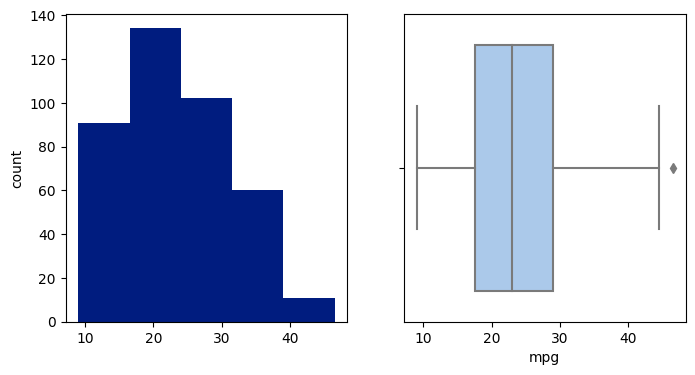

cylinders
Skew : 0.53


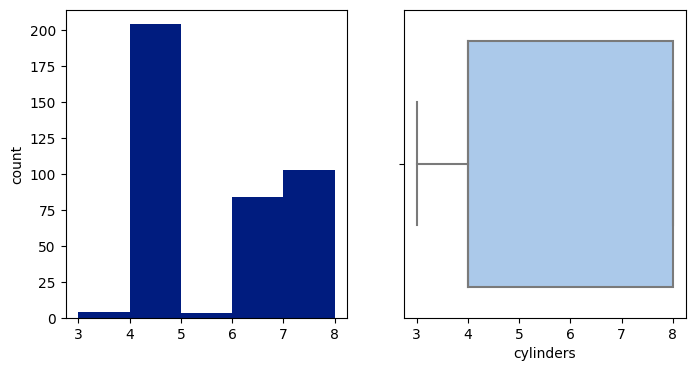

displacement
Skew : 0.72


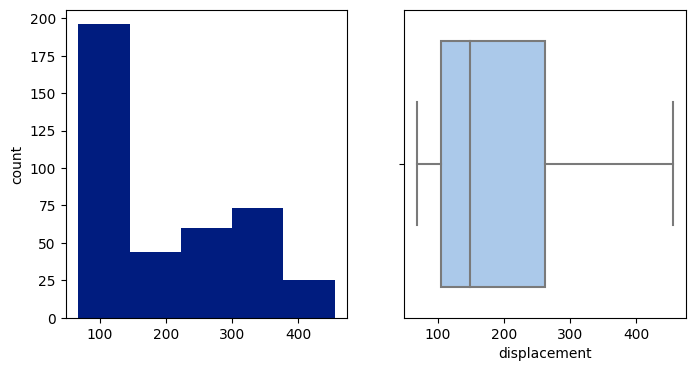

horsepower
Skew : 1.11


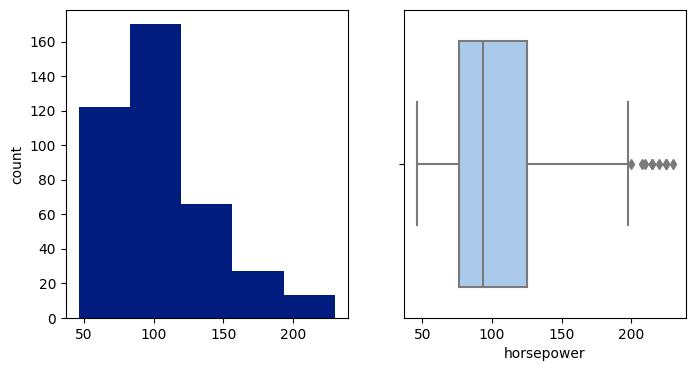

weight
Skew : 0.53


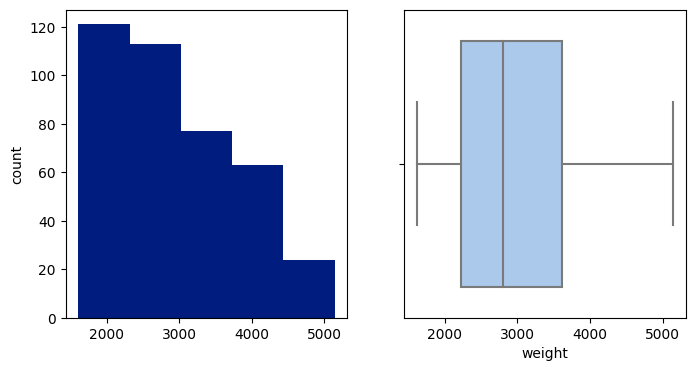

acceleration
Skew : 0.28


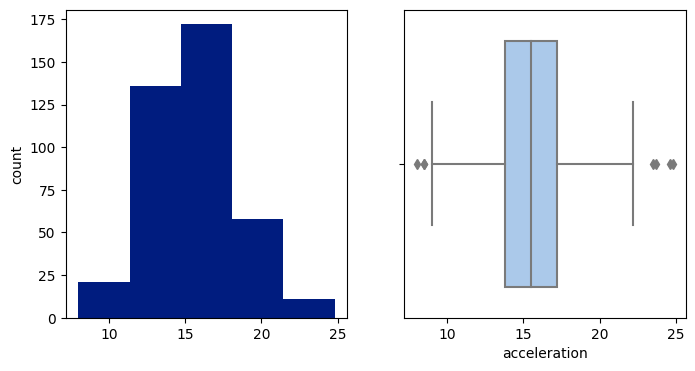

model year
Skew : 0.01


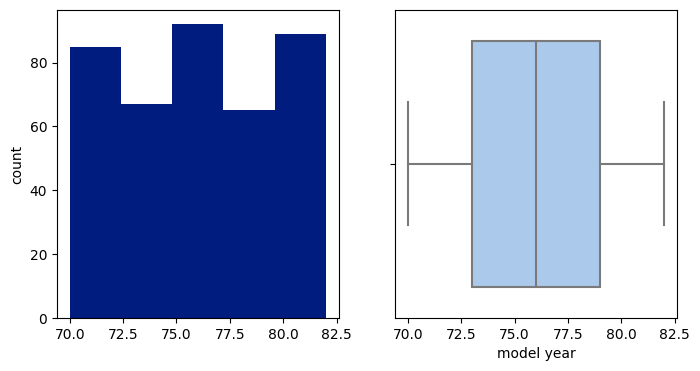

In [ ]:
#For loop
for col in df.columns:
    print(col)

    #calculate skewness of the distribution of the data
    print('Skew :', round(df[col].skew(), 2))

    plt.figure(figsize = (8, 4))

    #countplots + adding color
    sns.set_palette("dark")
    plt.subplot(1, 2, 1)

    df[col].hist(bins = 5, grid = False)

    plt.ylabel('count')

    #Boxplots + adding color
    sns.set_palette("pastel")

    plt.subplot(1, 2, 2)

    sns.boxplot(x = df[col])

    plt.show()

**Observations:**
* MPG is skewed right, with 50% of the observations lying between ~15MPG and ~30MPG. There is also one outlier, as I had assumed from looking at the summary statistics. That outlier is 46.6MPG.
* Looking at the histogram for cylinders, it appears the data has a bimodal shape to it, though that could be due to the bin size used. In any case, the majority of the observations lie between 4 and 8 cylinders, with the tail trending towards 3.
* Displacement is skewed right, with the majority of the observations hovering around 100 and about 280. But we see on the boxplot, the whisker extends to a max beyond 400.
* Horsepower is also skewed right, and the boxplot reveals outliers. The outliers are above 200, as I had suspected.
* Again, weight is skewed right, with an average just under 3000.
* Acceleration is interesting because the histogram has a normal bell shape curve and the boxplot reveals outliers on both sides of the whiskers. So, there are a couple cars with an acceleration less than 10 and some with an acceleration over the max of ~24.
* The model year histogram shows trimodal distribution with 3 peaks. Again, this could be because of the number of bins we are using for the histograms. The boxplot shows no outliers.

Next we will check the correlation between the variables.


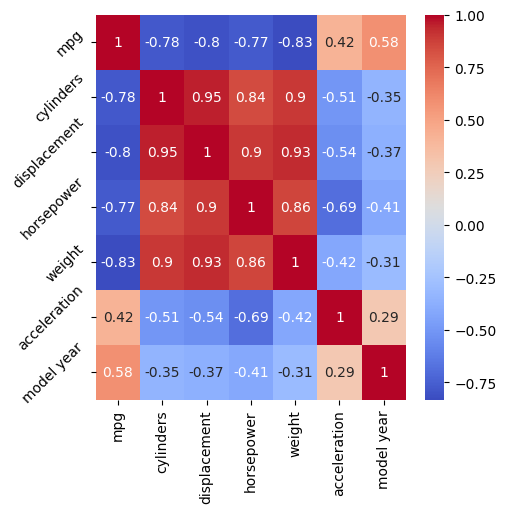

In [ ]:
#Creating heatmap with cool/warm colors
plt.figure(figsize = (5, 5))

sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

#Rotate y labels and x labels
plt.yticks(rotation=45)

#plt.xticks(rotation = 45)


plt.show()

**Observations:** In the heatmap above, the closer to red a box is the more correlation there is. We can see a strong positive correlation between the following:
* displacement and cylinders
* horsepower and cylinders
* weight and cylinders
* weight and horsepower
* weight and displacement

There is some positive correlation between the following:
* model year and mpg
* acceleration and mpg

There does not seem to be as much correlation between acceleration and other variables as well as mgp and other variables.

In the next section, we will scale the data. Why? Because we would like to perform Principal Component Analysis, which is a technique to capture the the maximum variance. It removes features that don't provide a lot of insight but keeps variables that may provide more insight, or at least keeps the variables with maximum variation. But, in order to perform PCA, we must scale the data. With the original dataset, we have floating numbers and integers, all with different units of measure (ie, pounds, years, horsepower etc). So, we must level the playing field a bit before performing PCA.

### **Scaling the data**

In [ ]:
#Here we will use Standard Scaler
scaler = StandardScaler()

#Here, we can create a dataframe using the scaled data.
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)

df_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


Now we see that the numbers have been scaled to have a mean of about 0 and a variance of about 1.

## **Principal Component Analysis**

In [ ]:
#Now we will use the sklearn library to perform PCA.
from sklearn.decomposition import PCA

n = df_scaled.shape[1]

# Create a PCA instance: pca
pca = PCA(n_components=n)

#Using dataframe here
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))

#To see the percentage of variance explained by each principal component, we can use the following code:
explained_var = pca.explained_variance_ratio_

In [ ]:
#Here, I used the low code version plus references to the Air Pollution Data Exploration case study to help with this section.
# Defining the number of principal components to generate
n = df_scaled.shape[1]

# Finding principal components for the data
# Apply the PCA algorithm with random_state = 1
pca = PCA(n_components = n, random_state = 1)

# Fit and transform the pca function on scaled data
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

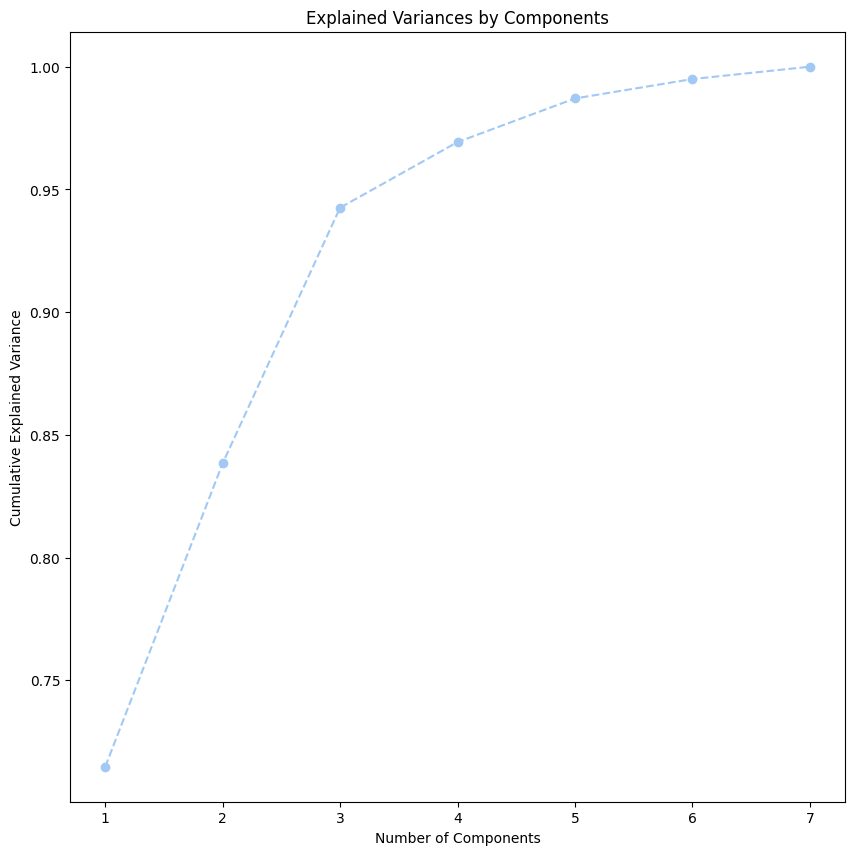

In [ ]:
#Next, let's visualize the explained variance. Note that I also referenced the code from the Air Pollution case study here.
plt.figure(figsize = (10, 10))

plt.plot(range(1, 8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

Now that we have visualized the explained variance by individual components, we will find the least number of compenents that can explain morethan 90% of the variation of the data. To do this, I will use the code found in the low code version. BUT, I will note here that we can see the fewest components that explain 90% of the data can be found by using the plot above. We see that at 3 components, nearly 95% of the variance can be explained.

In [ ]:
sum = 0
#Using a for loop here, along with exp_var which we defined in cell 30
for ix, i in enumerate(exp_var):
    sum = sum + i
    if(sum>0.90):
        print("Number of PCs that explain at least 90% variance: ", ix + 1)
        break

Number of PCs that explain at least 90% variance:  3


Now that we know the number of components that explain 90% of the variance is 3, let's now make a new dataframe with those principal components. We will use the column titles PC1, PC2, and PC3.

In [ ]:
cols = ['PC1', 'PC2', 'PC3']

df_pc1 = pd.DataFrame(np.round(pca.components_.T[:, 0:3], 2), index = df_scaled.columns, columns = cols)

def color_high(val):
  if val <= -0.40:
    return 'background: red'
  elif val >= 0.40:
    return 'background: green'

df_pc1.T.style.applymap(color_high)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
PC1,-0.400000,0.420000,0.430000,0.420000,0.410000,-0.280000,-0.230000
PC2,-0.210000,-0.190000,-0.180000,-0.090000,-0.220000,0.020000,-0.910000
PC3,-0.260000,0.140000,0.100000,-0.170000,0.280000,0.890000,-0.020000


#### **Interpret the coefficients of the first three principal components from the below DataFrame**

**Observations:**
* The first principal component seems to be releated to cylinders, displacement, horsepower, and weight. This makes sense, because we can see a strong positive correlation between these variables in our correlation matrix.
* In the second principal component, we see a -0.91 highlighted in red. This indicates an inverse relationship between the original variable (model year) and PC2.
* The third principal component seems to be explaining acceleration. It is the opposite of PC2, where we saw that model year has an inverse relationship and PC2. This time, we see that acceleration has a positive relationship with PC3. Thus, as acceleration increases, we can expect an increase in PC3.

#### **Visualize the data in 2 dimensions using the first two principal components**



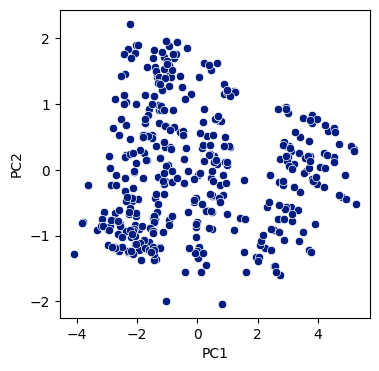

In [ ]:
#Now let's use a scatterplot to visualize the principal components.
plt.figure(figsize = (4, 4))

sns.set_palette("dark")

sns.scatterplot(x = df_pca[0], y = df_pca[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

**Observations:** In the plot above, we see two groups, one on the right and one on the left. The right grouping is smaller than the left grouping. To make things more interesting, let's look at various hues that we add to the plots.

In [ ]:
#In order to add a hue, we must concatenate the original dataset with the PCA dataset. We do that here below.
df_pca.head()
df.head()
df_concat = pd.concat([df_pca, df], axis = 1)
df_concat.head()


,0,1,2,3,4,5,6,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,2.661556,0.918577,-0.558420,0.740000,-0.549433,-0.089079,-0.118566,18.0,8,307.0,130.0,3504,12.0,70
1,3.523307,0.789779,-0.670658,0.493223,-0.025134,0.203588,0.101518,15.0,8,350.0,165.0,3693,11.5,70
2,2.998309,0.861604,-0.982108,0.715598,-0.281324,0.137351,-0.055167,18.0,8,318.0,150.0,3436,11.0,70
3,2.937560,0.949168,-0.607196,0.531084,-0.272607,0.295916,-0.121296,16.0,8,304.0,150.0,3433,12.0,70
4,2.930688,0.931822,-1.078890,0.558607,-0.543871,0.007707,-0.167301,17.0,8,302.0,140.0,3449,10.5,70


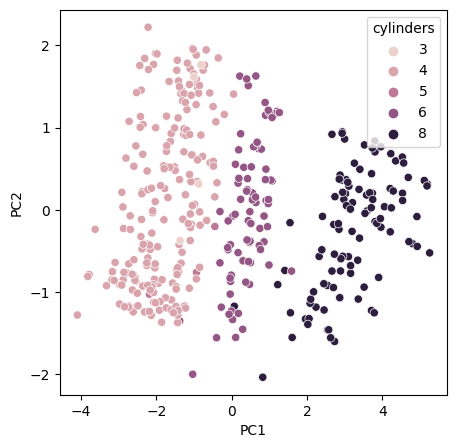

In [ ]:
#Now let's use a scatterplot to visualize the principal components this time with fun hues. The first hue we will use is cylinders.
plt.figure(figsize = (5, 5))

sns.set_palette("dark")

sns.scatterplot(x = df_concat[0], y = df_concat[1], hue = df_concat['cylinders'])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

**Observations:** As time goes on, we see fewer 8 cylinder cars. The darker color represents 8 cylinders.

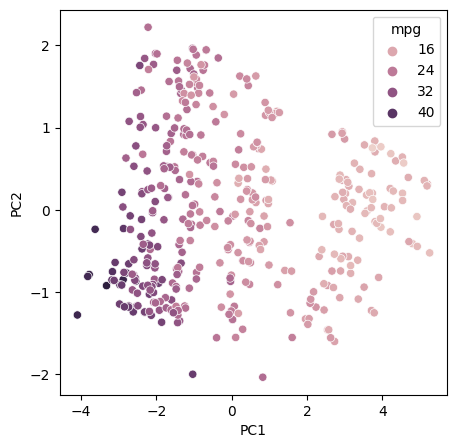

In [ ]:
#Now let's use a scatterplot to visualize PC1 and PC2 with a hue of MGP.
plt.figure(figsize = (5, 5))

sns.set_palette("dark")

sns.scatterplot(x = df_concat[0], y = df_concat[1], hue = df_concat['mpg'])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

We can see that newer cars (lower left section of the data), has better MPG than does the older cars. Also, if we look at this plot and the previous plot (cylinders) together then we can infer that the cars with higher numbers of cylinders have lower MPG.

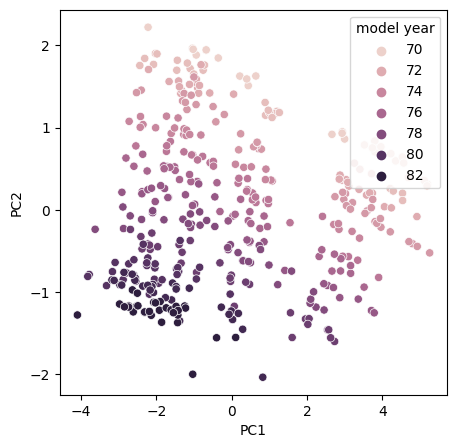

In [ ]:
#Now let's use a scatterplot to visualize PC 1 and PC2 with model year as hue.
plt.figure(figsize = (5, 5))

sns.set_palette("dark")

sns.scatterplot(x = df_concat[0], y = df_concat[1], hue = df_concat['model year'])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

The newer cars are represented by the dark purple group in the lower left corner. These cars also have fewer cylinders (as seen in the cylinders plot) and they also have better gas mileage.

**Observations:**
From the scatter plots above, we see mainly two large groups of vehicles:
* Those with higher cylinders, lower MPG and mostly older in model year
* Those with fewer cylinders, higher MPT and many that are newer in model year. This group is larger than the first, and variablility in model year is greater.

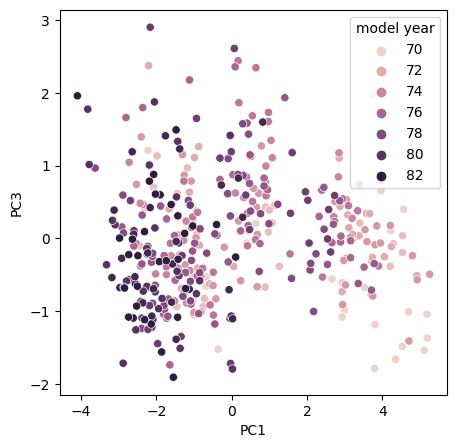

In [ ]:
#Now let's use a scatterplot to visualize the principal components this time with fun hues. The first hue we will use is cylinders.
plt.figure(figsize = (5, 5))

sns.set_palette("dark")

sns.scatterplot(x = df_concat[0], y = df_concat[2], hue = df_concat['model year'])

plt.xlabel("PC1")

plt.ylabel("PC3")

plt.show()

## **t-SNE**

**Note:** The following code was taken from the low code version of this workbook. I modified it and added to it to make it work for me.

In [ ]:
#In the code below, we choose n_components = 2 so that T-SNE embeds the data in a 2 dimentional space.
tsne = TSNE(n_components = 2, random_state = 1)

#Here we will fit the scaled dataframe to tsne
df_tsne = tsne.fit_transform(df_scaled)

#Now we will observe the shape of the new tsne dataframe.
df_tsne.shape

(398, 2)

Here we see there are 2 columns and 398 rows.

In [ ]:
#Next, let's give the two columns names, Comp1 and Comp2, short for Component 1 and Component 2
df_tsne = pd.DataFrame(data = df_tsne, columns = ['Comp1', 'Comp2'])

#Now let's check the first few rows of data using the .head() function
df_tsne.head()

,Comp1,Comp2
0,37.579971,2.138400
1,38.064915,0.073901
2,38.115463,1.203496
3,37.521984,1.321069
4,38.225060,1.684076


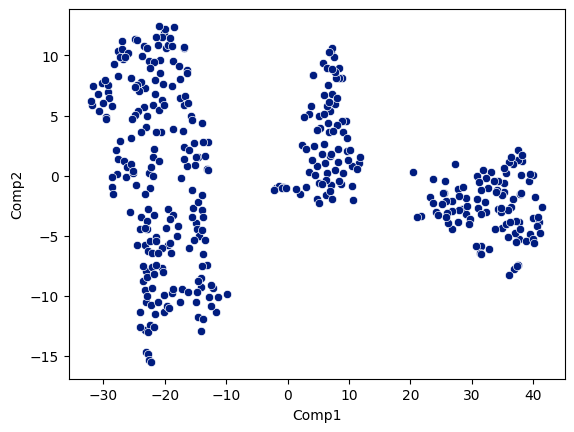

In [ ]:
sns.scatterplot(x = df_tsne.iloc[:,0], y = df_tsne.iloc[:,1])

plt.show()

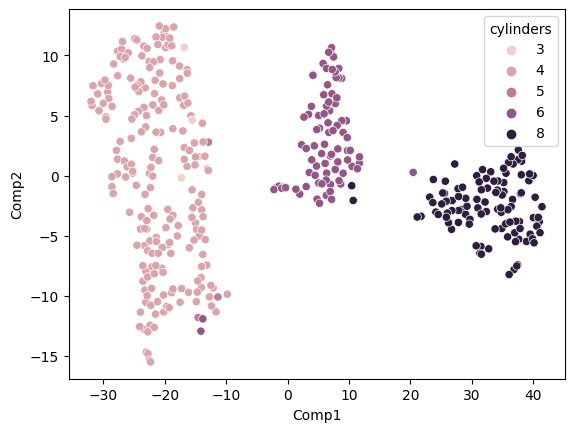

In [ ]:
# Let's see the scatter plot of the data w.r.t number of cylinders
sns.scatterplot(x = df_tsne.iloc[:,0], y = df_tsne.iloc[:,1], hue = df.cylinders)

plt.show()

In [ ]:
df_pca.head()
df.head()
df_concat = pd.concat([df_tsne, df], axis = 1)
df_concat.head()

,Comp1,Comp2,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,37.579971,2.138400,18.0,8,307.0,130.0,3504,12.0,70
1,38.064915,0.073901,15.0,8,350.0,165.0,3693,11.5,70
2,38.115463,1.203496,18.0,8,318.0,150.0,3436,11.0,70
3,37.521984,1.321069,16.0,8,304.0,150.0,3433,12.0,70
4,38.225060,1.684076,17.0,8,302.0,140.0,3449,10.5,70


In [ ]:
# Let's assign points to 3 different groups
def grouping(x):
    first_comp = x['Comp1']

    second_comp = x['Comp2']

    if (first_comp < -9):
        return 'group_1'

    if (first_comp > -9 ) and (first_comp < 12):
        return 'group_2'

    else:
        return 'group_3'

In [ ]:
df_tsne['groups'] = df_tsne.apply(grouping, axis = 1)

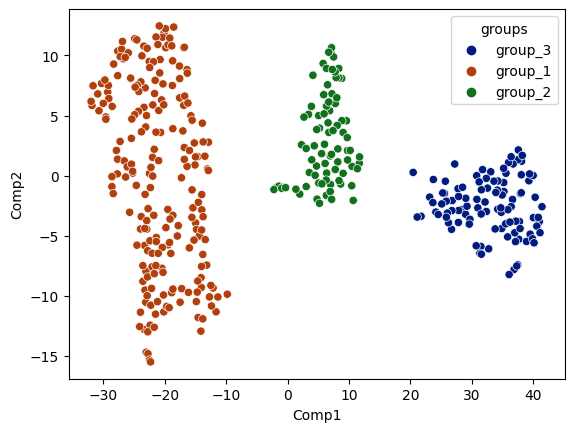

In [ ]:
sns.scatterplot(x = df_tsne.iloc[:,0], y = df_tsne.iloc[:,1], hue = df_tsne.iloc[:,2])

plt.show()

In [ ]:
df['groups'] = df_tsne['groups']

#### **Visualize the clusters w.r.t different variables using scatter plot and box plot**

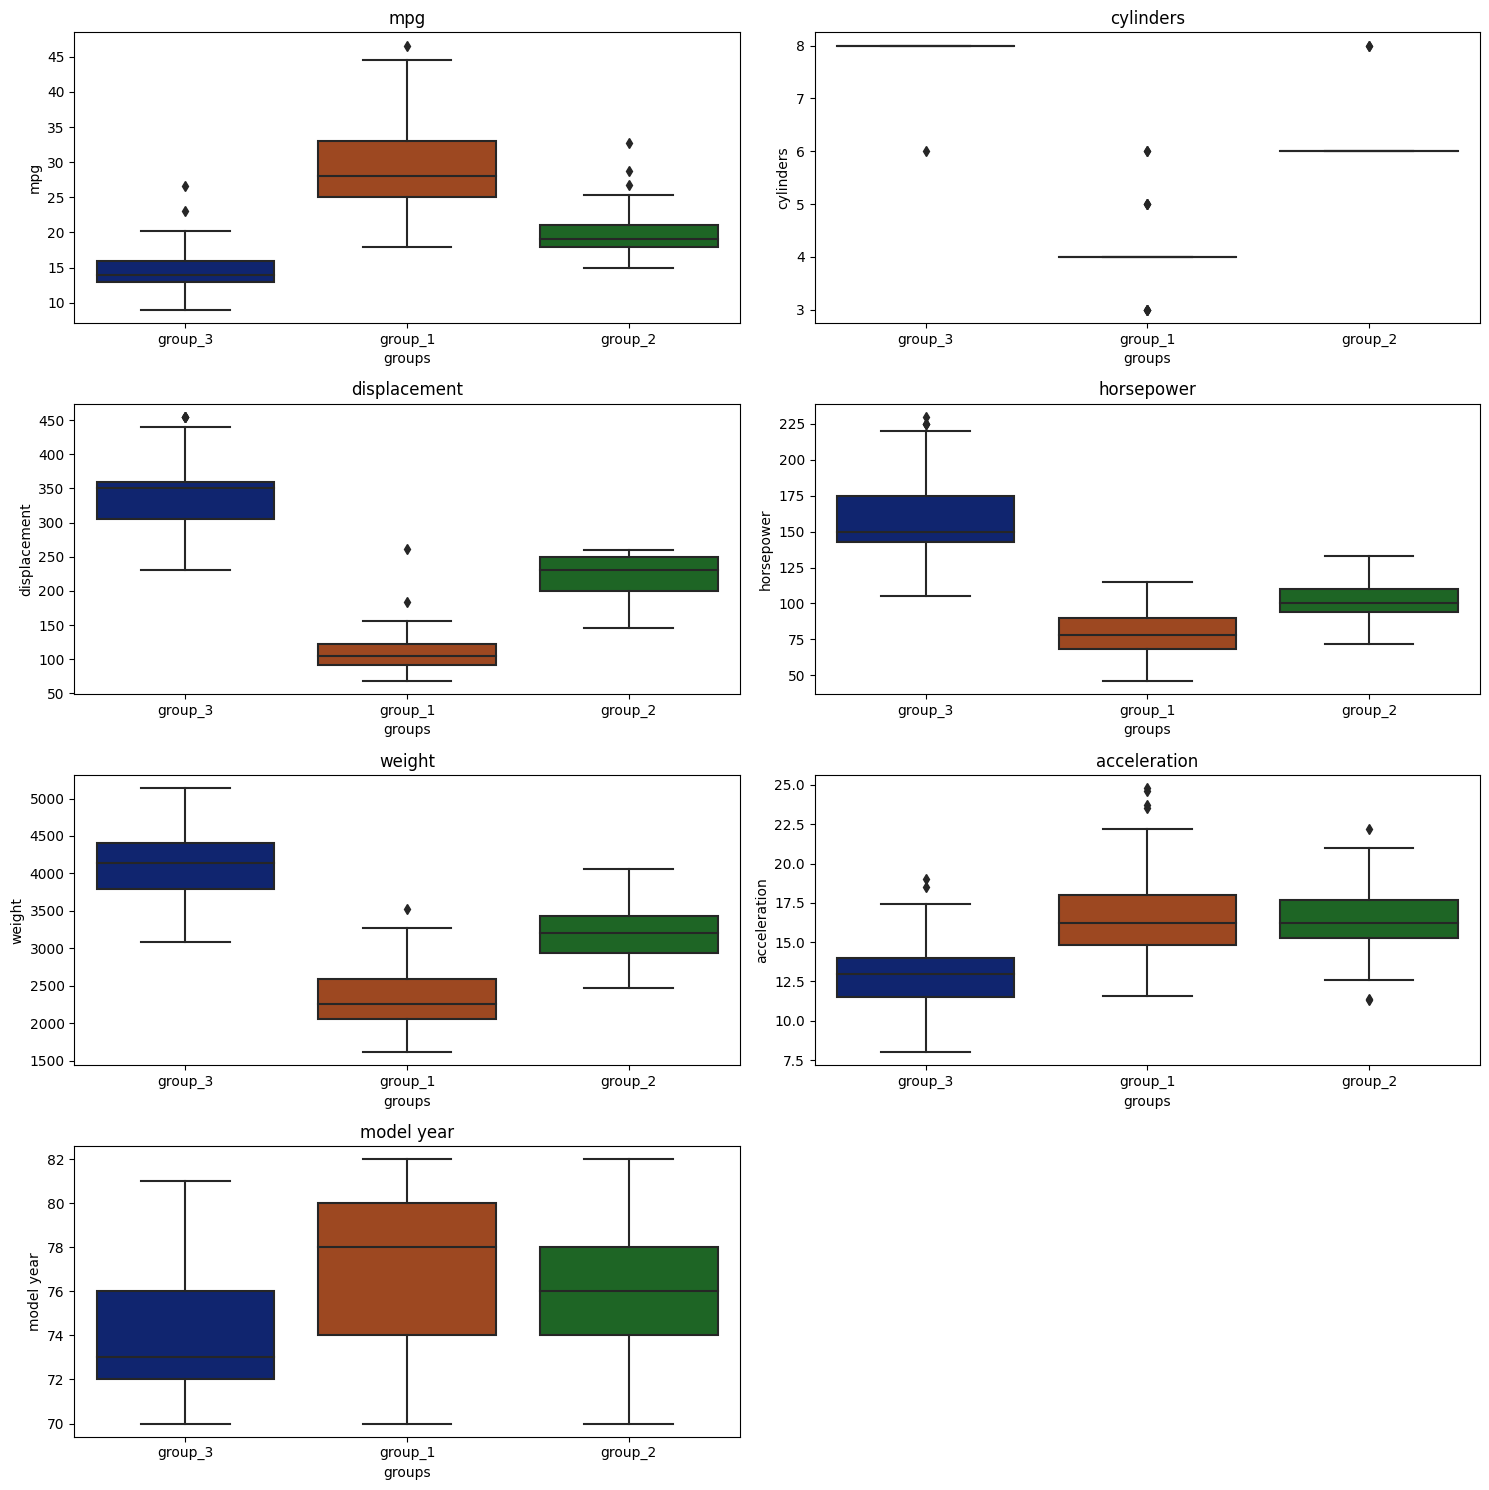

In [ ]:
all_col = df.columns.tolist()

plt.figure(figsize = (15, 15))

for i, variable in enumerate(all_col):
    if i == 7:
        break

    plt.subplot(4, 2, i + 1)

    sns.boxplot(y = df[variable], x = df['groups'])

    plt.tight_layout()

    plt.title(variable)


plt.show()

**Observations:**

Boxplot Observations:
* Group one contains cars that, on average have the highest MPG, fewest cylinders, lowest weight, lowest displacement and the newest model year.
* Group two contains cars that are the heaviest in weight, have the highest number of cylinders, the most displacement, highest horespower, lowest acceleration, and lowest average model year.
* Group three contains cars that are in the middle of groups 1 and 2.

## **Actionable Insights and Recommendations**

**write your insights and recommendations here:**

Observations:
* There are 3 distinct groups of vehicles.
* The largest group contains cars that are lighter in weight, have fewer cylinders, better MPG, faster accleration, lowest displacement and newest model year. These are likley of the four door sedan make of cars.
* The next largest group is one in which the cars are heavier, have slower acceleration, higher horsepower, and worse gas mileage. These might be hauling vehicles such as trucks.
* The third group of vehicles has medium MPG,horsepower, acceleration, and displacement.

Recommendations:
* The largest group of cars are the newer models with better MPG. My first recommendation would be to increase stock of these vehicles. In this changing environment with shifting market conditions, globalization and cost pressure impacting most industries, the target market will likley be seeking vehicles that have better gas mileage.
* The second largest group contains vehicles with more hauling power and lower gas mileage. This sort of vehicle (likely trucks) appeal to a separate group of customers who may be less interested in saving gas money and more interested in the vehicle's abilities to haul effectively. This cluster is smaller than the first, so SecondLife ought to keep a good selection on hand, but perhaps not as many as the first group or cluster.
* The smallest group are those with some hauling power, variable MPG, and medium acceleration. Keeping a few of these types of vehicles in stock (but not too many) will appeal to a third customer-type.